In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_h1.csv")

In [3]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [4]:
df_original = df

del df['open']
del df['high']
del df['low']

In [5]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [6]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.293391
10    1.293515
11    1.293557
12    1.293662
13    1.293729
14    1.293743
15    1.293844
16    1.293748
17    1.293637
18    1.293534
19    1.293392
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.293392
20    1.293314
21    1.293239
22    1.293212
23    1.293227
24    1.293276
25    1.293426
26    1.293630
27    1.293867
28    1.294037
29    1.294228
Name: SMA20, dtype: float64

In [9]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29429,0,NaN,NaN
1,2012-01-02 01:00:00,1.29410,0,NaN,NaN
2,2012-01-02 02:00:00,1.29387,0,NaN,NaN
3,2012-01-02 03:00:00,1.29307,0,NaN,NaN
4,2012-01-02 04:00:00,1.29255,0,NaN,NaN
...,...,...,...,...,...
61989,2021-12-30 20:00:00,1.13060,0,1.131937,1.132641
61990,2021-12-30 21:00:00,1.13272,0,1.132192,1.132480
61991,2021-12-30 22:00:00,1.13193,0,1.132220,1.132318
61992,2021-12-30 23:00:00,1.13257,0,1.132218,1.132217


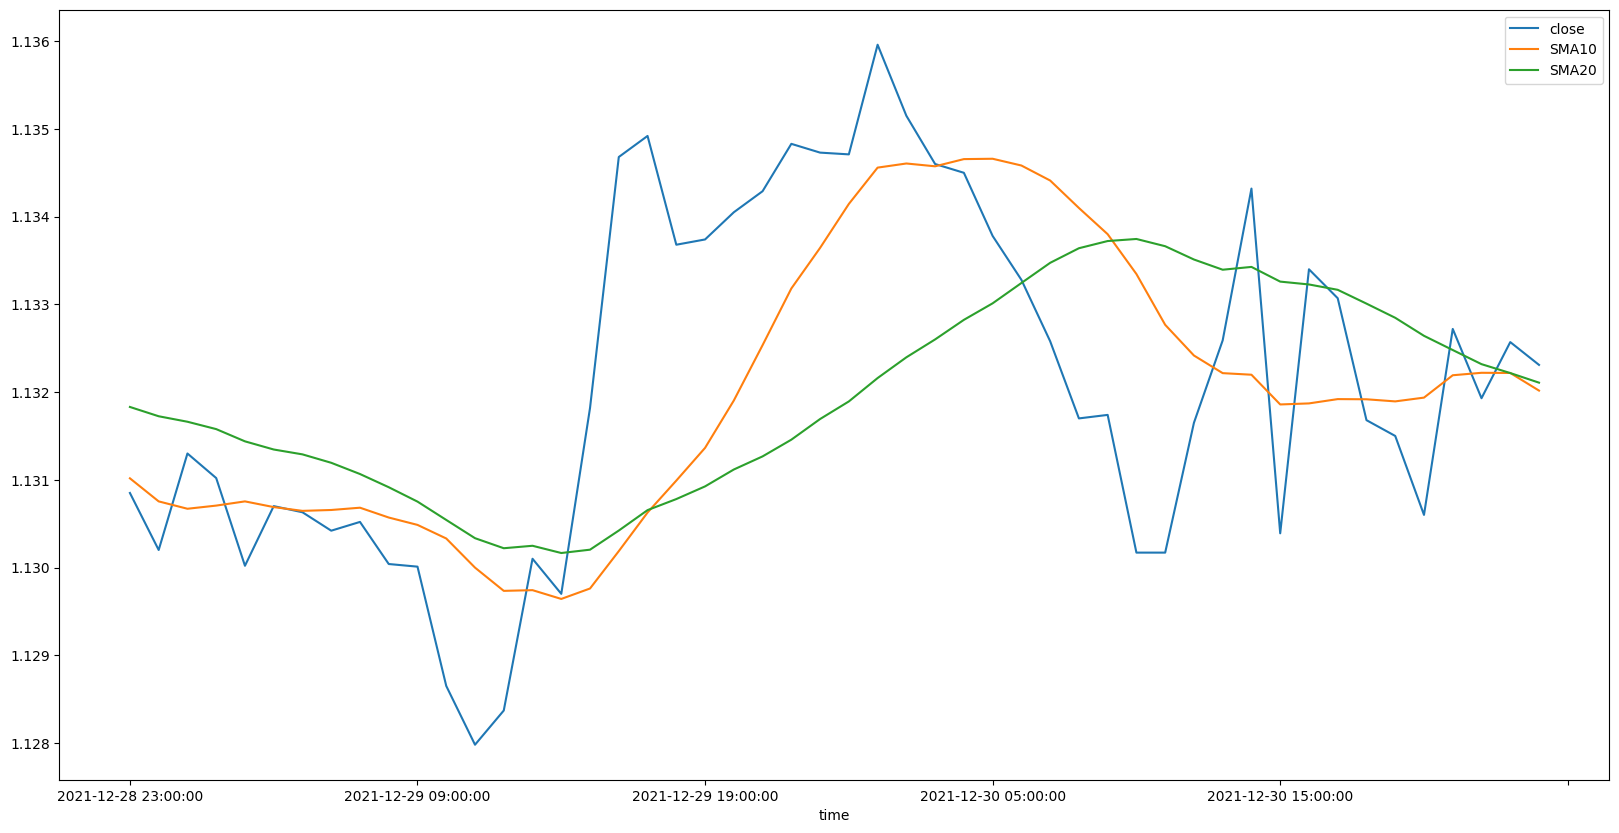

In [10]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [11]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [12]:
df['Signal'].value_counts()

0.0    31104
1.0    30866
Name: Signal, dtype: int64

In [13]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [14]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [15]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
61944,2021-12-28 23:00:00,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN


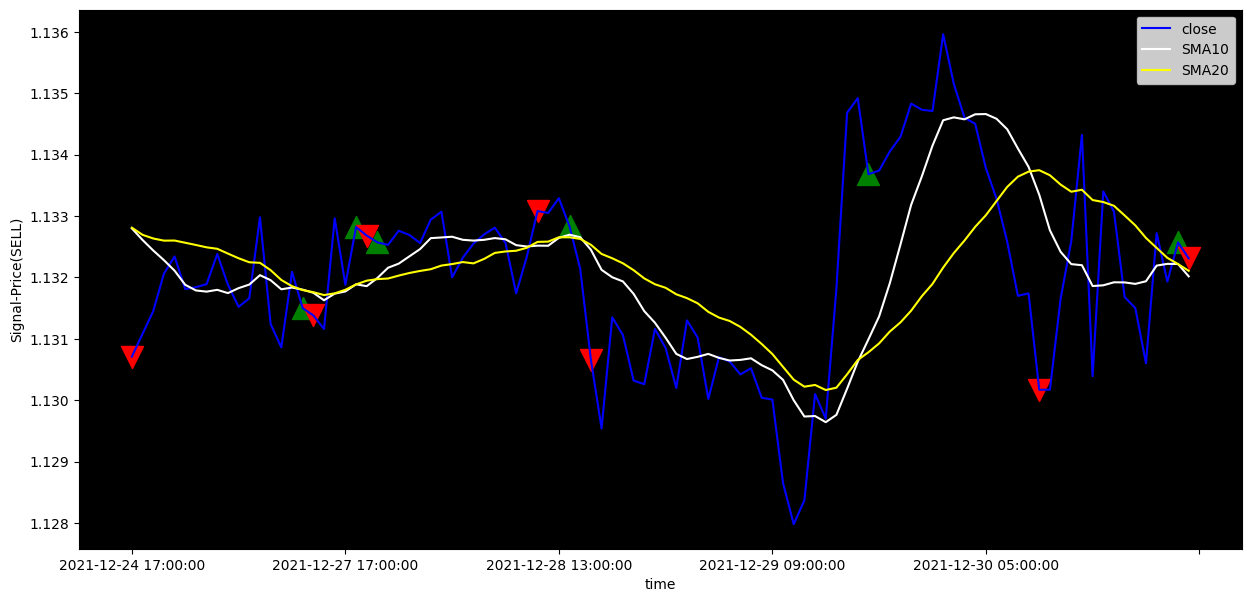

In [16]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [17]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
61944,2021-12-28 23:00:00,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN


In [18]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [19]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [20]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 19:00:00,1.29259,0,1.293392,1.293392,1.0,1.0,1.29259,NaN,NaN
20,2012-01-02 20:00:00,1.29274,0,1.293113,1.293314,0.0,0.0,NaN,1.29274,0.00015
27,2012-01-03 03:00:00,1.29779,0,1.294098,1.293867,1.0,1.0,1.29779,NaN,-0.00505
54,2012-01-04 06:00:00,1.30336,0,1.304315,1.304454,0.0,0.0,NaN,1.30336,0.00557
130,2012-01-09 10:00:00,1.27759,0,1.271596,1.271572,1.0,1.0,1.27759,NaN,0.02577
...,...,...,...,...,...,...,...,...,...,...
61937,2021-12-28 16:00:00,1.13066,0,1.132450,1.132531,0.0,0.0,NaN,1.13066,-0.00217
61963,2021-12-29 18:00:00,1.13368,0,1.130991,1.130780,1.0,1.0,1.13368,NaN,-0.00302
61979,2021-12-30 10:00:00,1.13017,0,1.133346,1.133746,0.0,0.0,NaN,1.13017,-0.00351
61992,2021-12-30 23:00:00,1.13257,0,1.132218,1.132217,1.0,1.0,1.13257,NaN,-0.00240


In [21]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [22]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
20,2012-01-02 20:00:00,1.29274,0,1.293113,1.293314,0.0,0.0,NaN,1.29274,0.00015,Profit
54,2012-01-04 06:00:00,1.30336,0,1.304315,1.304454,0.0,0.0,NaN,1.30336,0.00557,Profit
130,2012-01-09 10:00:00,1.27759,0,1.271596,1.271572,1.0,1.0,1.27759,NaN,0.02577,Profit
197,2012-01-12 05:00:00,1.27166,0,1.271226,1.271195,1.0,1.0,1.27166,NaN,0.00357,Profit
230,2012-01-13 14:00:00,1.27246,0,1.281438,1.281767,0.0,0.0,NaN,1.27246,0.00080,Profit
...,...,...,...,...,...,...,...,...,...,...,...
61866,2021-12-23 13:00:00,1.13240,0,1.133069,1.133069,0.0,0.0,NaN,1.13240,0.00199,Profit
61878,2021-12-24 01:00:00,1.13231,0,1.132510,1.132422,1.0,1.0,1.13231,NaN,0.00009,Profit
61917,2021-12-27 20:00:00,1.13257,0,1.131990,1.131972,1.0,1.0,1.13257,NaN,0.00011,Profit
61932,2021-12-28 11:00:00,1.13308,0,1.132517,1.132578,0.0,0.0,NaN,1.13308,0.00051,Profit


In [23]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
61944,2021-12-28 23:00:00,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']